In [2]:
import pandas as pd

# Load the cleaned data
combined_schedule = pd.read_csv('combined_schedule.csv')

1. Predict what courses would be offered for next 4 years for each semester using: 
   - semester, 
   - year, 
   - course #
   - (some courses are offered every year and some are offered once two years or once 4 years or it could also be like a one year thing.)
    
1. make a csv file for the predicted course offerings for each year with semester like FA24, SP24, FA25, SP25....
    csv file includes:
    -  course #, 
    -  course title,  
    -  credits,
    -  likelihood of the course being offered in that semester and year as a percentage. 

### Create a dictionary with course offering years

In [3]:
import pandas as pd

# Load the cleaned data
combined_schedule = pd.read_csv('combined_schedule.csv')

# Remove spaces from the Course # column
combined_schedule['Course #'] = combined_schedule['Course #'].str.replace(' ', '')

# Convert Course # to upper case
combined_schedule['Course #'] = combined_schedule['Course #'].str.upper()

# Remove any \n characters
combined_schedule['Course #'] = combined_schedule['Course #'].str.replace('\n', '')

# Replace _and_, _, or, OR with /
combined_schedule['Course #'] = combined_schedule['Course #'].str.replace(r'(_AND_|_,_|_or_|_OR_)', '/')

# Order the data by Course #
combined_schedule_sorted = combined_schedule.sort_values(by='Course #')

# Create a list of unique offering years with semesters for each unique Course #
offering_years = {}
course_titles = {}

for course_number, group in combined_schedule_sorted.groupby('Course #'):
    # Create a set of unique offering years with semesters and sort them
    offering_years[course_number] = sorted(set(group.apply(lambda x: f"{x['Year']}{x['Semester']}", axis=1)))
    course_titles[course_number] = group.iloc[0]['Course Title']

# Display the dictionaries
print("Offering Years Dictionary:")
print(offering_years)
print("\nCourse Titles Dictionary:")
print(course_titles)

Offering Years Dictionary:
{'AHSE0112': ['2014FA', '2014SP', '2015FA', '2015SP', '2016FA', '2016SP', '2017FA', '2017SP', '2018FA', '2018SP', '2019FA', '2019SP', '2020FA', '2020SP', '2021FA', '2021SP', '2022FA', '2022SP', '2023FA', '2023SP'], 'AHSE1100': ['2014FA', '2015FA', '2016FA', '2017FA', '2018FA', '2019FA', '2020FA', '2021FA', '2022FA'], 'AHSE1122': ['2014FA', '2015FA', '2016FA', '2017FA', '2018FA', '2019FA', '2021FA', '2022FA', '2023FA'], 'AHSE1135': ['2015FA', '2016FA', '2017FA', '2018FA', '2019FA'], 'AHSE1145': ['2014FA', '2015FA'], 'AHSE1148': ['2018FA', '2019FA'], 'AHSE1150': ['2018FA'], 'AHSE1155': ['2014FA', '2016FA', '2017FA', '2020FA', '2021FA', '2022FA', '2023FA'], 'AHSE1160': ['2021FA', '2022FA', '2023FA'], 'AHSE1170': ['2022FA'], 'AHSE1199': ['2014FA', '2015FA', '2016FA', '2017FA', '2018FA', '2019FA', '2020FA', '2021FA', '2023FA'], 'AHSE1199A': ['2023FA'], 'AHSE1500': ['2014SP'], 'AHSE1515': ['2014FA', '2015FA', '2015SP', '2016SP', '2017SP', '2018SP', '2019SP', '2020S

Make dataframe with course offering availability for each semester (0 and 1)

In [4]:
# Get all unique semesters
semesters = ['2014FA', '2014SP','2015FA', '2015SP','2016FA', '2016SP',
             '2017FA', '2017SP','2018FA', '2018SP','2019FA', '2019SP',
             '2020FA', '2020SP','2021FA', '2021SP','2022FA', '2022SP',
             '2023FA', '2023SP', ]

# Initialize DataFrame
course_offering = pd.DataFrame(columns=semesters)

# Iterate over each course and update DataFrame
for course, offerings in offering_years.items():
    row_data = {semester: 1 if semester in offerings else 0 for semester in semesters}
    course_offering.loc[course] = row_data

# Fill missing values with 0
course_offering = course_offering.fillna(0)

# Print DataFrame
print(course_offering.head(10))

          2014FA  2014SP  2015FA  2015SP  2016FA  2016SP  2017FA  2017SP  \
AHSE0112       1       1       1       1       1       1       1       1   
AHSE1100       1       0       1       0       1       0       1       0   
AHSE1122       1       0       1       0       1       0       1       0   
AHSE1135       0       0       1       0       1       0       1       0   
AHSE1145       1       0       1       0       0       0       0       0   
AHSE1148       0       0       0       0       0       0       0       0   
AHSE1150       0       0       0       0       0       0       0       0   
AHSE1155       1       0       0       0       1       0       1       0   
AHSE1160       0       0       0       0       0       0       0       0   
AHSE1170       0       0       0       0       0       0       0       0   

          2018FA  2018SP  2019FA  2019SP  2020FA  2020SP  2021FA  2021SP  \
AHSE0112       1       1       1       1       1       1       1       1   
AHSE1100   

In [5]:
course_offering.size

5240

### Split test and train data


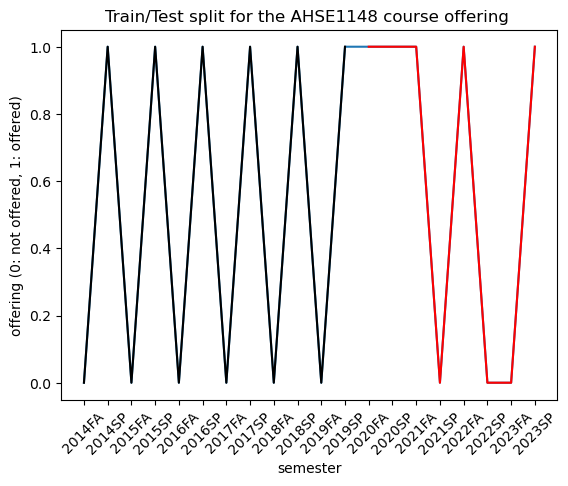

In [6]:
import matplotlib.pyplot as plt
prediction_course_number = 'ENGR2320'

# course_offering.T['AHSE0112']
plt.plot(course_offering.T[prediction_course_number])
train = course_offering.drop(columns=['2020FA', '2020SP','2021FA', '2021SP','2022FA', '2022SP','2023FA', '2023SP'])
train.head(10)
test = course_offering[['2020FA', '2020SP','2021FA', '2021SP','2022FA', '2022SP','2023FA', '2023SP']]
test.head(10)

plt.plot(train.T[prediction_course_number], color = 'black')
plt.plot(test.T[prediction_course_number], color = 'red')
plt.ylabel('offering (0: not offered, 1: offered)')
plt.xlabel('semester')
plt.xticks(rotation=45)
plt.title('Train/Test split for the AHSE1148 course offering ')
plt.show()

In [7]:
a=0
for prediction_course_number in course_offering.index:
    a+=1
a

262

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# prediction_course_number = 'AHSE1515'
prediction = {}
for prediction_course_number in course_offering.index:
       y = train.T[prediction_course_number]
       # define model
       ARMAmodel = SARIMAX(y, order = (1,1,2))
       # fit model
       ARMAmodel = ARMAmodel.fit()
       prediction_semesters = ['2020FA', '2020SP', '2021FA', '2021SP', '2022FA', '2022SP', '2023FA',
              '2023SP', '2024FA', '2024SP', '2025FA', '2025SP', '2026FA', '2026SP', '2027FA',
              '2027SP',]
       prediction_semesters = pd.DataFrame(prediction_semesters)
       print(prediction_semesters.index)
       # generate predictions
       y_pred = ARMAmodel.get_forecast(16)
       y_pred_df = y_pred.conf_int(alpha = 0.05) 
       y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
       y_pred_df.index = range(12, 28)
       y_pred_out = y_pred_df["Predictions"] 

       prediction[prediction_course_number] = y_pred_out


/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Futu


At iterate    5    f=  6.60535D-01    |proj g|=  1.68862D-01

At iterate   10    f=  6.17364D-01    |proj g|=  4.61794D-02

At iterate   15    f=  6.03472D-01    |proj g|=  1.13006D-02

At iterate   20    f=  6.01939D-01    |proj g|=  1.26335D-02

At iterate   25    f=  6.01609D-01    |proj g|=  3.74714D-04

At iterate   30    f=  6.01472D-01    |proj g|=  3.20098D-02

At iterate   35    f=  6.01311D-01    |proj g|=  3.93038D-03

At iterate   40    f=  6.01279D-01    |proj g|=  1.17357D-03

At iterate   45    f=  6.01279D-01    |proj g|=  9.81208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     77   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     46      1     0     0   6.240D-03   4.196D-01
  F =  0.41963016515161294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63830D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.01658D-01    |proj g|=  8.89205D-08

           * * *

Tit   = total 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76      1     0     0   6.335D-04   2.653D-01
  F =  0.26531494634282154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76      1     0     0   6.335D-04   2.653D-01
  F =  0.26531494634282154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   10    f=  1.23241D+02    |proj g|=  1.10462D+04

At iterate   15    f=  1.55666D+01    |proj g|=  5.49496D+02

At iterate   20    f=  1.68237D+00    |proj g|=  2.57379D+01

At iterate   25    f=  3.96324D-01    |proj g|=  5.80892D-01

At iterate   30    f=  3.02761D-01    |proj g|=  5.23755D-01

At iterate   35    f=  2.66767D-01    |proj g|=  2.38939D-02

At iterate   40    f=  2.65451D-01    |proj g|=  1.41435D-02

At iterate   45    f=  2.65324D-01    |proj g|=  3.96377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76      1     0     0   6.335D-04   2.653D-01
  F =  0.265314946342


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   35    f=  6.50616D-01    |proj g|=  8.00298D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     51      1     0     0   8.003D-06   6.506D-01
  F =  0.65061563812138135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66667D+09    |proj g|=  9.16067D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as


At iterate   35    f=  2.66996D-01    |proj g|=  2.38140D-02

At iterate   40    f=  2.65332D-01    |proj g|=  7.50213D-03

At iterate   45    f=  2.65274D-01    |proj g|=  5.01077D-04

At iterate   50    f=  2.65273D-01    |proj g|=  8.83680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70      1     0     0   8.837D-05   2.653D-01
  F =  0.26527313345123121     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  4.95829D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Futu


At iterate    5    f= -1.75949D-01    |proj g|=  7.99197D-01

At iterate   10    f= -1.26033D+00    |proj g|=  1.11916D+01

At iterate   15    f= -2.66476D+00    |proj g|=  5.45750D+01

At iterate   20    f= -3.56509D+00    |proj g|=  2.59392D+01
  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B COD


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate    5    f=  5.04405D-01    |proj g|=  1.94201D-01

At iterate   10    f=  5.02282D-01    |proj g|=  2.34629D-03

At iterate   15    f=  5.02268D-01    |proj g|=  8.82709D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     32      1     0     0   1.322D-05   5.023D-01
  F =  0.50226762121336754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25000D+

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47843D+09    |proj g|=  1.33285D+14

At iterate    5    f=  9.17151D+02    |proj g|=  2.18988D+05

At iterate   10    f=  1.23244D+02    |proj g|=  1.10463D+04

At iterate   15    f=  1.55666D+


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75000D+09    |proj g|=  1.26454D+14
  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99204D-01

At iterate   10    f= -1.26012D+00    |pro


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00  -3.471D+00
  F =  -3.4714931443530994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/hom


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23    147      3     1     0   1.029D+00  -3.471D+00
  F =  -3.4714931443530994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75000D+09    |proj g|=  1.26454D+14
  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99204D-01

At iterate   10    f= -1.26012D+00    |pro


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


At iterate   20    f=  1.68237D+00    |proj g|=  2.57379D+01

At iterate   25    f=  3.96324D-01    |proj g|=  5.80892D-01

At iterate   30    f=  3.02761D-01    |proj g|=  5.23755D-01

At iterate   35    f=  2.66767D-01    |proj g|=  2.38939D-02

At iterate   40    f=  2.65451D-01    |proj g|=  1.41435D-02

At iterate   45    f=  2.65324D-01    |proj g|=  3.96377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     76      1     0     0   6.335D-04   2.653D-01
  F =  0.26531494634282154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


At iterate   40    f=  5.76757D-01    |proj g|=  1.35817D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     57      1     0     0   1.358D-02   5.768D-01
  F =  0.57675693030807140     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75000D+09    |proj g|=  1.26454D+14
  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |pro


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a m


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66667D+09    |proj g|=  9.16067D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.63830D-01    |proj g|=  7.50010D-01

At iterate    5    f=  7.07358D-01    |proj g|=  1.41132D-01

At iterate   10    f=  6.95321D-01    |proj g|=  5.10148D-03

At iterate   15    f=  6.92837D-01    |proj g|=  4.97545D-03

At iterate   20    f=  6.92634D-01    |proj g|=  3.62999D-03

At iterate   25    f=  6.92595D-01    |proj g|=  1.46104D-03

At iterate   30    f=  6.92593D-01    |proj g|=  1.41489D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91667D+09    |proj g|=  1.10729D+14

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.71030D+00    |proj g|=  8.49927D+00

At iterate    5    f=  8.18202D-01    |proj g|=  4.30086D-02

At iterate   10    f=  8.03363D-01    |proj g|=  3.99242D-02

At iterate   15    f=  7.76381D-01    |proj g|=  7.04016D-02

At iterate   20    f=  7.72953D-01    |proj g|=  1.75929D-02

At iterate   25    f=  7.72590D-01    |proj g|=  3.29958D-03

At iterate   30    f=  7.72556D-01    |proj g|=  1.31933D-04

At iterate   35    f=  7.72554D-01    |proj g|=  1.35578D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proje


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75000D+09    |proj g|=  1.26454D+14
  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99197D-01

At iterate   10    f= -1.26033D+00    |pro


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 

RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.41249D-01    |proj g|=  1.58729D-01

At iterate    5    f=  5.40548D-01    |proj g|=  2.65927D-02

At iterate   10    f=  5.24676D-01    |proj g|=  7.83910D-02

At iterate   15    f=  5.21682D-01    |proj g|=  3.70494D-02

At iterate   20    f=  5.19466D-01    |proj g|=  1.63019D-02

At iterate   25    f=  5.19094D-01    |proj g|=  1.18041D-02

At iterate   30    f=  5.18949D-01    |proj g|=  7.57392D-03

At iterate   35    f=  5.18939D-01    |proj g|=  4.86088D-03

At iterate   40    f=  5.18938D-01    |proj g|=  2.41026D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at 

 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62289D-01    |proj g|=  3.39937D-01

At iterate    5    f=  6.64274D-01    |proj g|=  2.58225D-02

At iterate   10    f=  6.62270D-01    |proj g|=  1.57556D-01

At iterate   15    f=  6.37930D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/


At iterate   30    f=  3.00454D-01    |proj g|=  5.76622D-01

At iterate   35    f=  2.66996D-01    |proj g|=  2.38140D-02

At iterate   40    f=  2.65332D-01    |proj g|=  7.50213D-03

At iterate   45    f=  2.65274D-01    |proj g|=  5.01077D-04

At iterate   50    f=  2.65273D-01    |proj g|=  8.83680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70      1     0     0   8.837D-05   2.653D-01
  F =  0.26527313345123121     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate    5    f=  6.87977D-01    |proj g|=  1.35817D-01

At iterate   10    f=  6.73110D-01    |proj g|=  4.68808D-03

At iterate   15    f=  6.72520D-01    |proj g|=  1.07895D-02

At iterate   20    f=  6.72446D-01    |proj g|=  5.56343D-03

At iterate   25    f=  6.72425D-01    |proj g|=  2.95768D-03

At iterate   30    f=  6.72424D-01    |proj g|=  1.42773D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     54      1     0     0   3.444D-05   6.724D-01
  F =  0.67242364435388513     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  4.95829D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   4.958D+13  -8.828D+00
  F =  -8.8283224431379637     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06398D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.40660D-01    |proj g|=  1.26201D-02

At iterate   10    f=  2.40213D-01    |proj g|=  3.23187D-03

At iterate   15    f=  2.39955D-


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Futu


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91667D+09    |proj g|=  8.06508D+13

At iterate    5    f=  6.33403D-01    |proj g|=  2.35246D-01

At iterate   10    f=  4.86155D-01    |proj g|=  1.64936D-01

At iterate   15    f=  4.19798D-


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06398D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.40660D-01    |proj g|=  1.26201D-02

At iterate   10    f=  2.40213D-01    |proj g|=  3.23187D-03

At iterate   15    f=  2.39955D-


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63830D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.01658D-01    |proj g|=  8.89205D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

  ys=-4.070E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    5    f= -1.75949D-01    |proj g|=  7.99197D-01

At iterate   10    f= -1.26033D+00    |proj g|=  1.11916D+01

At iterate   15    f= -2.66476D+00    |proj g|=  5.45750D+01

At iterate   20    f= -3.56509D+00    |proj g|=  2.59392D+01
  ys=-6.475E-08  -gs= 3.265E-08 BFGS update SKIPPED

At iterate   25    f= -3.57006D+00    |proj g|=  8.93192D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28    206      4     2     0   3.430D-01  -3.570D+00
  F =  -3.5700575961242826     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeInde

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     20      1     0     0   8.944D+04   5.477D+02
  F =   547.65099127367387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.38182D-01    |proj g|=  9.14140D-01

At iterate    5    f=  2.77650D-01    |proj g|=  3.01264D-01

At iterate   10    f=  2.65693D-01    |proj g|=  9.71344D-03

At iterate   15    f=  2.65233D-


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Futu

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93388D+00    |proj g|=  1.80442D+01

At iterate    5    f=  7.35086D-01    |proj g|=  1.30644D-01

At iterate   10    f=  6.26964D-01    |proj g|=  5.06186D-02

At iterate   15    f=  5.92213D-01    |proj g|=  4.47224D-02

At iterate   20    f=  5.79558D-01    |proj g|=  1.81425D-02

At iterate   25    f=  5.77529D-01    |proj g|=  3.52354D-03

At iterate   30    f=  5.76934D-01    |proj g|=  1.34424D-03

At iterate   35    f=  5.76774D-01    |proj g|=  4.29128D-03

At iterate   40    f=  5.76730D-01    |proj g|=  5.84449D-03

At iterate   45    f=  5.76710D-01    |proj g|=  1.23562D-02

At iterate   50    f=  5.76701D-01    |proj g|=  1.09797D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


At iterate    5    f=  3.54242D-01    |proj g|=  1.21243D+00

At iterate   10    f=  2.59402D-01    |proj g|=  2.93843D-02

At iterate   15    f=  2.58334D-01    |proj g|=  5.32985D-02

At iterate   20    f=  2.57988D-01    |proj g|=  1.64348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     76      2     0     0   4.515D-05   2.580D-01
  F =  0.25798836501469558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variabl


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82832D+00    |proj g|=  5.17216D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     77      2     0     0   3.042D+04  -9.572D+00
  F =  -9.5718533597278803     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63830D-01    |proj g|=  1.15470D+00

At iterate    5    f=  2.01658D-01    |proj g|=  4.58319D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluati


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   45    f=  4.25043D-01    |proj g|=  6.25717D-03

At iterate   50    f=  4.24719D-01    |proj g|=  2.67274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     70      1     0     0   2.673D-03   4.247D-01
  F =  0.42471937928584186     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59869D-01    |proj g|=  9.67451D-01

At iterate    5    f=  3.07965D-

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     20      1     0     0   8.944D+04   5.477D+02
  F =   547.65136077357545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at t

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     22      1     0     0   1.136D+02   5.592D+00
  F =   5.5923552265839618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=16, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.33333D+08    |proj g|=  4.58033D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy se


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 

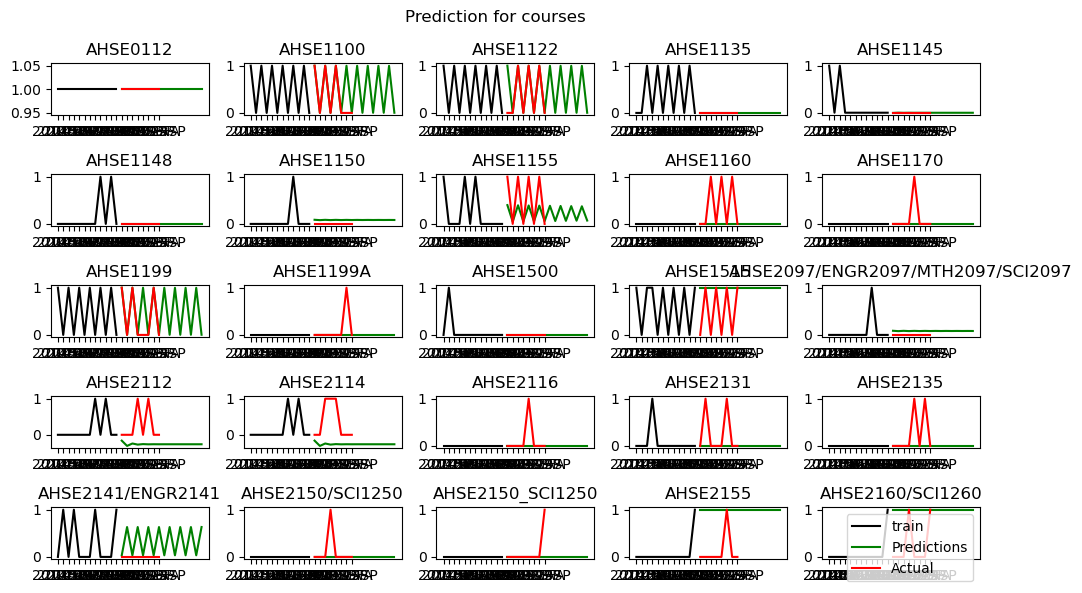

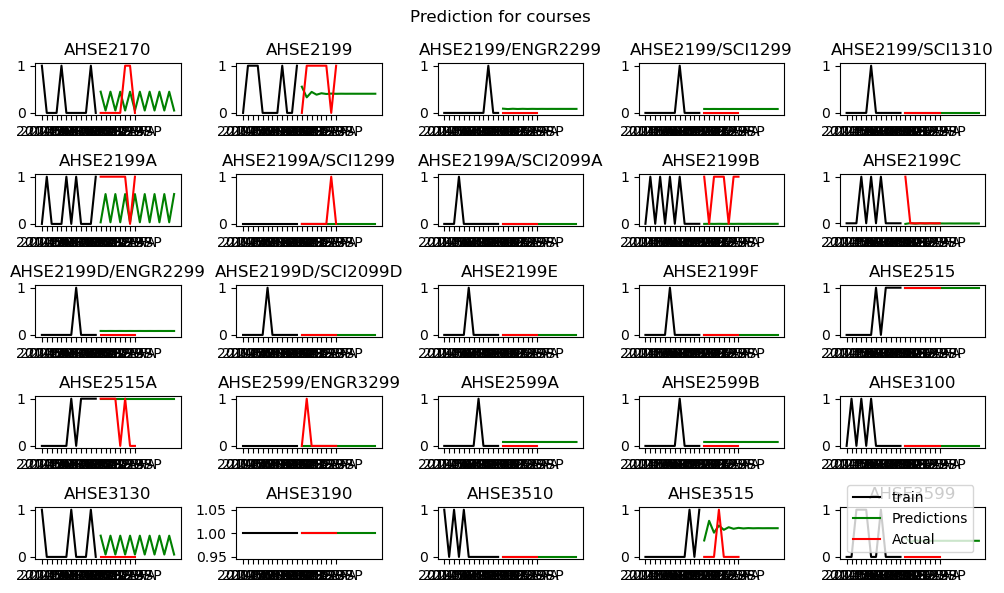

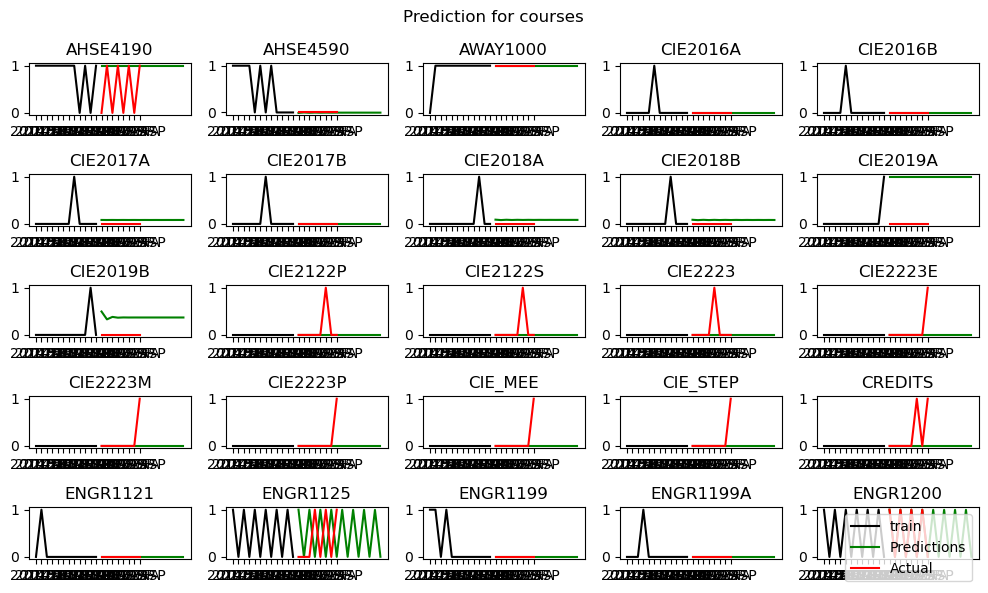

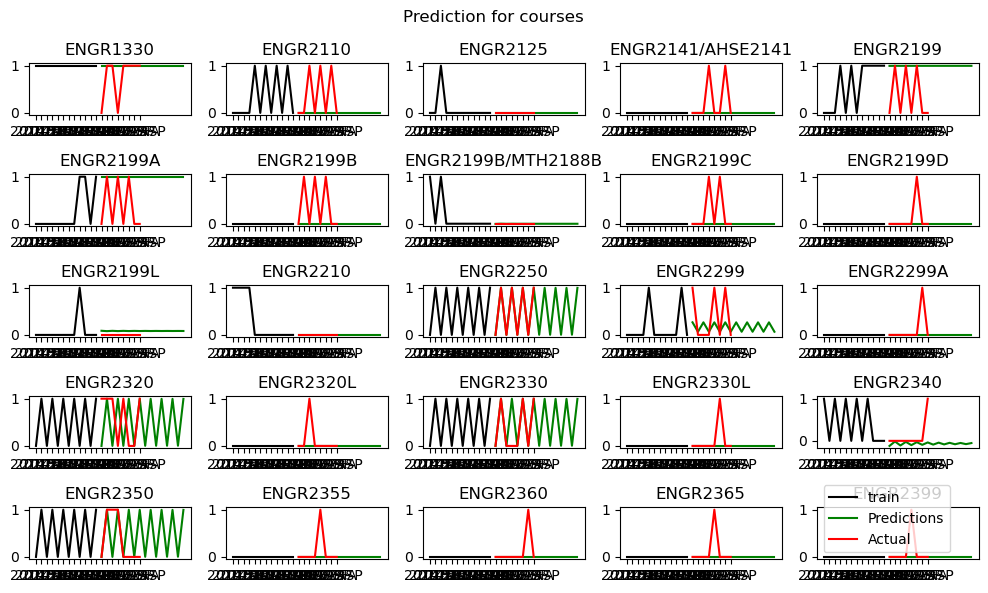

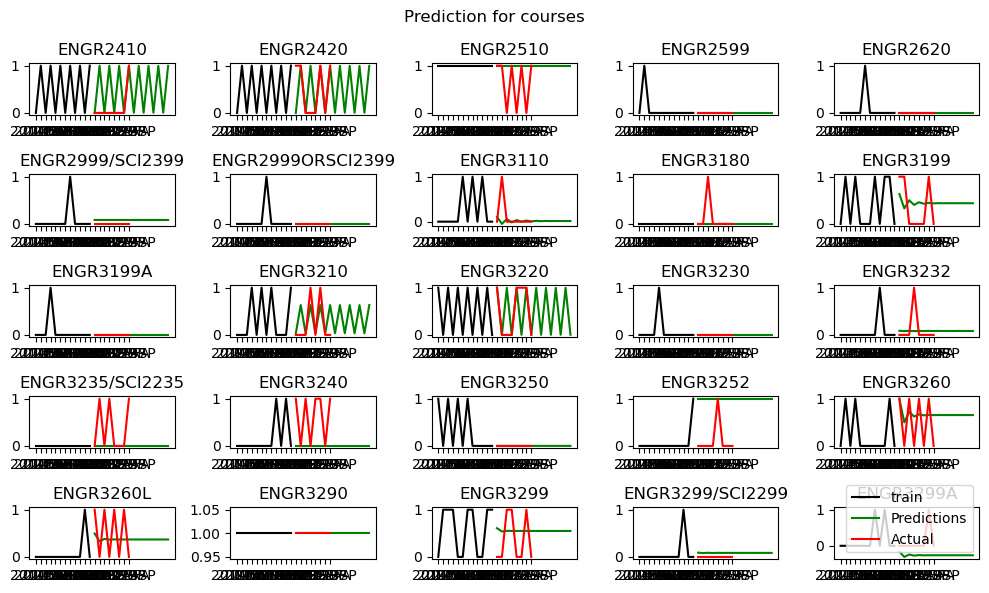

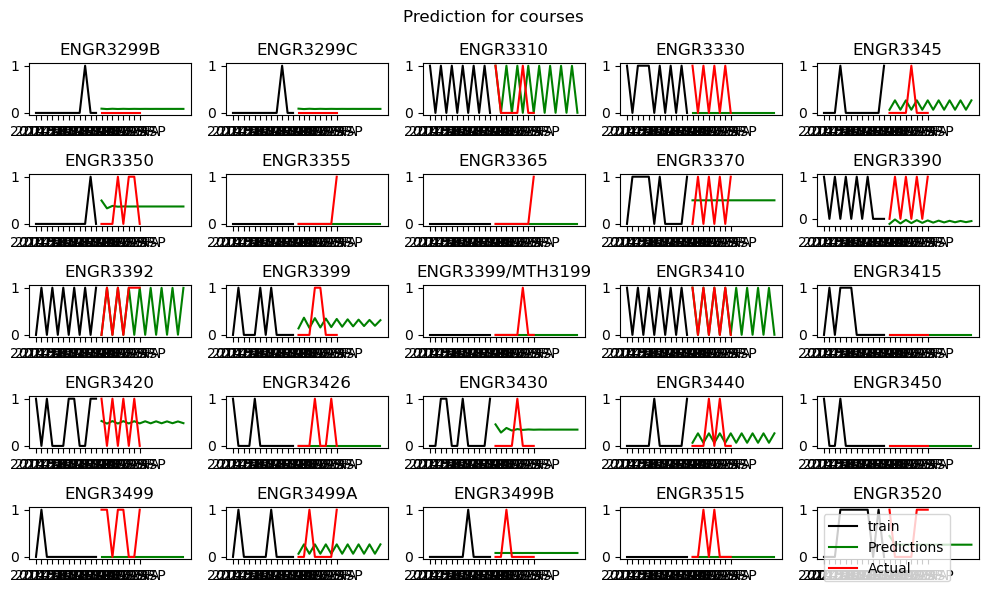

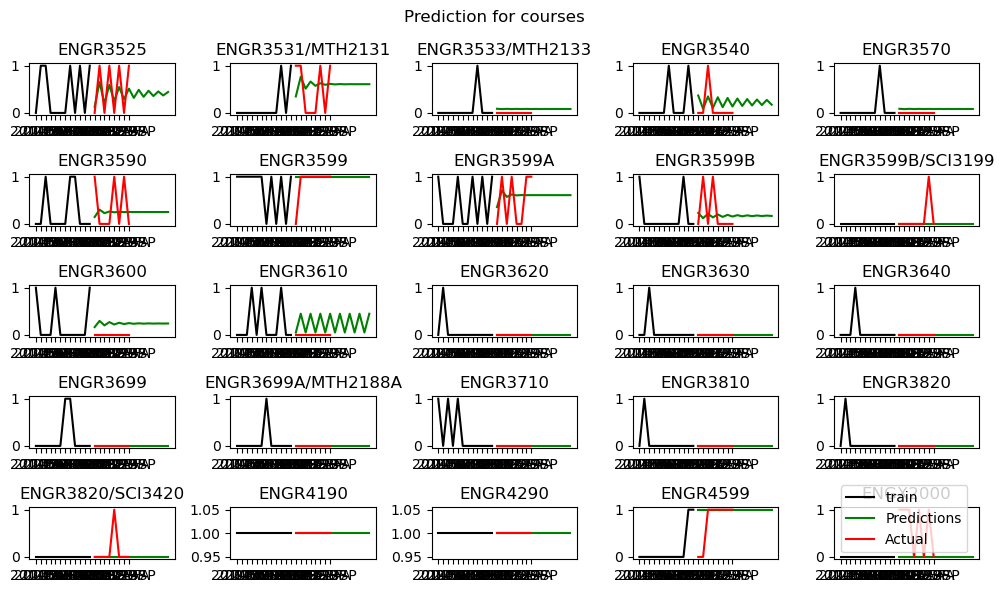

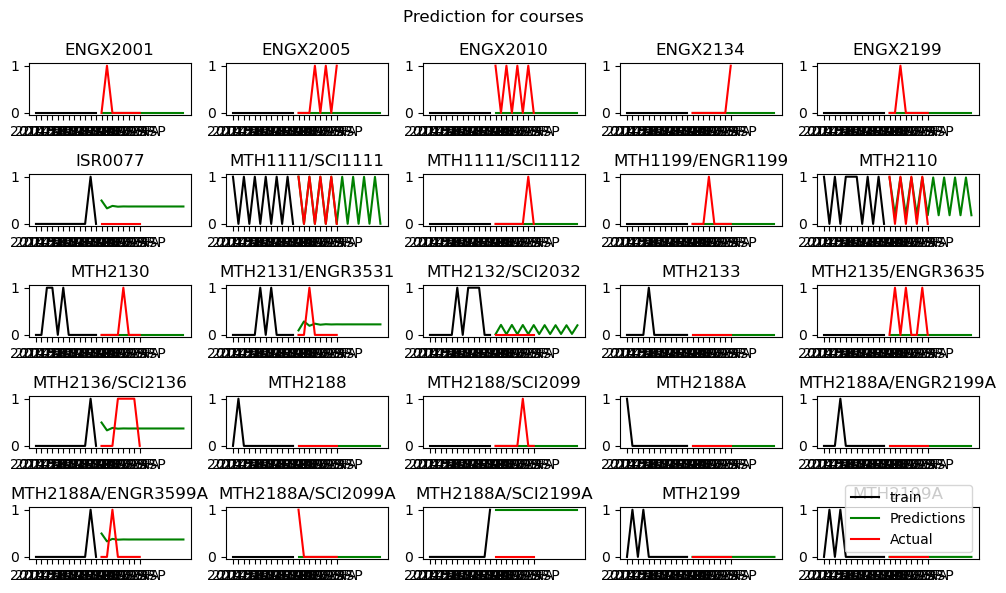

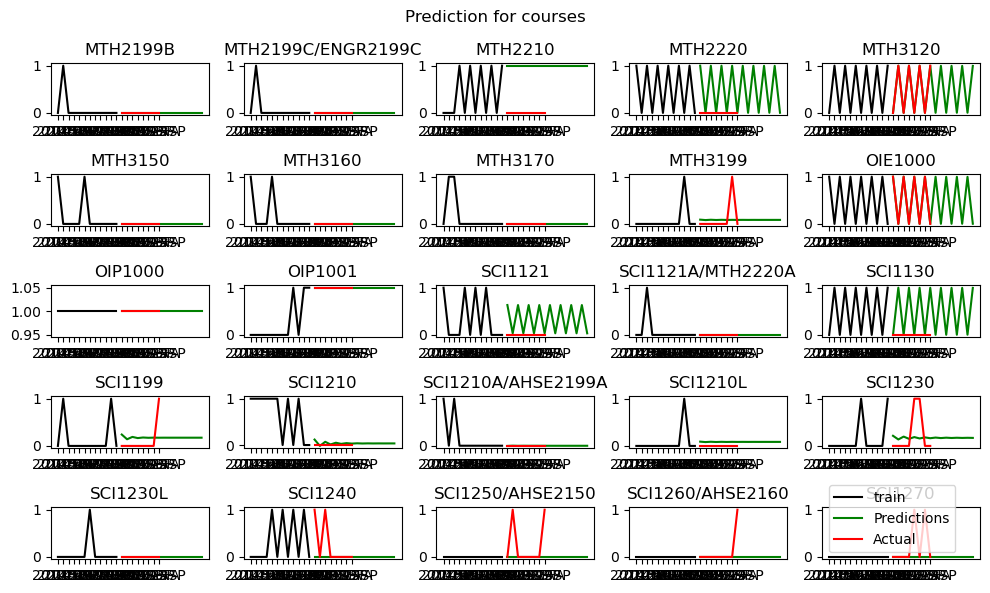

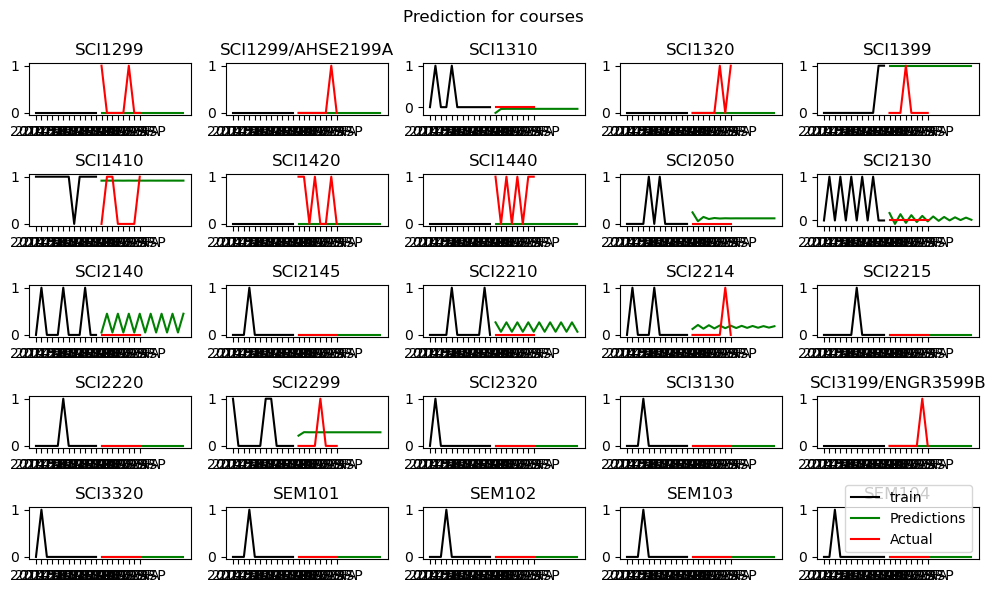

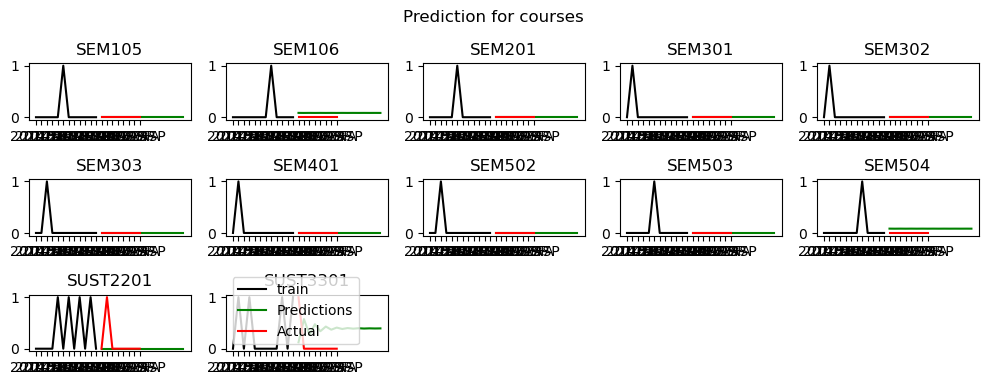

In [9]:
# Number of plots per figure
plots_per_figure = 25

# Calculate the number of figures needed
num_figures = len(prediction) // plots_per_figure + 1

# Loop through each figure
for fig_num in range(num_figures):
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Loop through each plot within the figure
    for i, (pcn, ypo) in enumerate(prediction.items()):
        # Skip plots that don't belong to the current figure
        if i // plots_per_figure != fig_num:
            continue
        
        # Plot the data
        plt.subplot(plots_per_figure // 5, 5, i % plots_per_figure + 1)
        y = train.T[pcn]
        plt.plot(y, color='black', label='train')
        plt.plot(ypo, color='green', label='Predictions')
        plt.plot(test.T[pcn], color='red', label='Actual')
        plt.title(pcn)
    
    # Adjust layout and show legend
    plt.suptitle('Prediction for courses')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Train for all 10 years

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

prediction = {}
for prediction_course_number in course_offering.index:
       y = course_offering.T[prediction_course_number]
       # define model
       ARMAmodel = SARIMAX(y, order = (1,1,2))
       # fit model
       ARMAmodel = ARMAmodel.fit()
       prediction_semesters = ['2024FA', '2024SP', '2025FA', '2025SP', 
                               '2026FA', '2026SP', '2027FA', '2027SP',]
       prediction_semesters = pd.DataFrame(prediction_semesters)
       print(prediction_semesters.index)
       # generate predictions
       y_pred = ARMAmodel.get_forecast(8)
       y_pred_df = y_pred.conf_int(alpha = 0.05) 
       y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
       y_pred_df.index = range(20, 28)
       y_pred_out = y_pred_df["Predictions"] 

       prediction[prediction_course_number] = y_pred_out

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  1.50788D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     71      2     0     0   3.430D+03  -1.018D+01
  F =  -10.175735742155677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at th


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element 


At iterate   15    f=  1.06624D-01    |proj g|=  5.65894D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   1.272D-04   1.066D-01
  F =  0.10662355352989947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45326D-02    |proj g|=  1.32669D+00

At iterate    5    f= -2.58481D-02    |proj g|=  8.14086D-02

At iterate   10    f= -2.64152D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as


At iterate   40    f=  6.20796D-01    |proj g|=  1.17945D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     58      1     0     0   1.589D-04   6.208D-01
  F =  0.62079590682292229     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64714D-01    |proj g|=  3.13326D-01

At iterate    5    f=  4.68135D-03    |proj g|=  6.01590D-02

At iterate   10    f= -6.27263D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     69      2     0     0   1.798D-05   2.935D-01
  F =  0.29348202614668678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50532D-01    |proj g|=  5.69849D-01

At iterate    5    f=  4.47782D-01    |proj g|=  2.19326D-01

At iterate   10    f=  4.33880D-01    |proj g|=  2.10216D-02

At iterate   15    f=  4.12103D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     17      1     0     0   5.363D+04   3.272D+02
  F =   327.19912151948984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34776D-01    |proj g|=  3.01980D-01

At iterate    5    f=  7.01399D-01    |proj g|=  4.70322D-02

At iterate   10    f=  6.76058D-01    |proj g|=  9.47660D-02

At iterate   15    f=  6.60645D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+08    |proj g|=  2.74820D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     17      1     0     0   5.363D+04   3.272D+02
  F =   327.19912151948984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element 


At iterate    5    f=  9.77187D-03    |proj g|=  1.95512D-01

At iterate   10    f=  2.96062D-03    |proj g|=  7.73449D-02

At iterate   15    f=  9.65093D-05    |proj g|=  2.91900D-02

At iterate   20    f= -7.89961D-05    |proj g|=  1.14529D-03

At iterate   25    f= -8.69835D-05    |proj g|=  4.09972D-03

At iterate   30    f= -8.74046D-05    |proj g|=  5.12127D-04

At iterate   35    f= -8.76038D-05    |proj g|=  2.70585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     61      1     0     0   4.231D-05  -8.760D-05
  F =  -8.7604665257789987E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75910D+00    |proj g|=  2.28516D+01

At iterate    5    f=  4.36133D-01    |proj g|=  4.51078D-02

At iterate   10    f=  4.35320D-01    |proj g|=  3.60671D-02

At iterate   15    f=  4.33817D-01    |proj g|=  3.56321D-03

At iterate   20    f=  4.33612D-01    |proj g|=  6.44359D-03

At iterate   25    f=  4.33579D-01    |proj g|=  4.75771D-03

At iterate   30    f=  4.33574D-01    |proj g|=  5.61789D-04

At iterate   35    f=  4.33573D-01    |proj g|=  1.62523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserW


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     45      1     1     0   6.406D-04  -8.693D-05
  F =  -8.6926286477212450E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79477D-02    |proj g|=  1.34091D+00

At iterate    5    f=  1.40927D-02    |proj g|=  1.64531D-01

At iterate   10    f=  1.91283D-03    |proj g|=  1.11012D-01

At iterate   15    f=  3.22899D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate   25    f= -8.64490D-05    |proj g|=  6.51977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     43      1     0     0   6.758D-03  -8.645D-05
  F =  -8.6449769596663725E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64714D-01    |proj g|=  3.13326D-01

At iterate    5    f=  6.05072D-04    |proj g|=  7.57742D-02

At iterate   10    f= -2.70549D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.975D+13  -9.535D+00
  F =  -9.5345882385890004     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12389D-01    |proj g|=  6.25741D-01

At iterate    5    f=  3.43838D-01    |proj g|=  2.52922D-03

At iterate   10    f=  3.43716D-01    |proj g|=  1.10725D-03

At iterate   15    f=  3.43687D-0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a m


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     64      1     0     0   1.149D-06   2.425D-01
  F =  0.24251198653664202     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71934D-01    |proj g|=  1.62162D-01

At iterate    5    f=  4.59994D-01    |proj g|=  3.35699D-03

At iterate   10    f=  4.59241D-01    |proj g|=  9.71704D-03

At iterate   15    f=  4.49568D-0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element 


At iterate   15    f=  1.60689D-01    |proj g|=  1.03438D-02

At iterate   20    f=  1.60674D-01    |proj g|=  1.25340D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     27      1     0     0   1.253D-05   1.607D-01
  F =  0.16067389954401107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64714D-01    |proj g|=  3.13326D-01

At iterate    5    f=  6.05072D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate   10    f=  5.83211D-01    |proj g|=  4.42534D-02

At iterate   15    f=  5.67565D-01    |proj g|=  4.21737D-02

At iterate   20    f=  5.64832D-01    |proj g|=  4.19839D-03

At iterate   25    f=  5.64629D-01    |proj g|=  1.46455D-02

At iterate   30    f=  5.64602D-01    |proj g|=  2.90560D-04

At iterate   35    f=  5.64602D-01    |proj g|=  1.28393D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     47      1     0     0   8.522D-06   5.646D-01
  F =  0.56460123230937997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-B

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting


At iterate   10    f= -6.27263D-04    |proj g|=  1.46047D-02

At iterate   15    f= -6.57866D-04    |proj g|=  5.29499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   4.952D-05  -6.579D-04
  F =  -6.5787542047917040E-004

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45326D-02    |proj g|=  1.32669D+00

At iterate    5    f= -2.58481D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17844D+00    |proj g|=  3.66806D+01

At iterate    5    f=  9.77187D-03    |proj g|=  1.95512D-01

At iterate   10    f=  2.96062D-03    |proj g|=  7.73449D-02

At iterate   15    f=  9.65093D-05    |proj g|=  2.91900D-02

At iterate   20    f= -7.89961D-05    |proj g|=  1.14529D-03

At iterate   25    f= -8.69835D-05    |proj g|=  4.09972D-03

At iterate   30    f= -8.74046D-05    |proj g|=  5.12127D-04

At iterate   35    f= -8.76038D-05    |proj g|=  2.70585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87684D+00    |proj g|=  6.99339D+00

At iterate    5    f=  6.89001D-01    |proj g|=  1.49944D-01

At iterate   10    f=  5.69694D-01    |proj g|=  7.16419D-02

At iterate   15    f=  5.43259D-01    |proj g|=  2.98642D-02

At iterate   20    f=  5.34218D-01    |proj g|=  4.57478D-03

At iterate   25    f=  5.31508D-01    |proj g|=  3.92433D-03

At iterate   30    f=  5.31066D-01    |proj g|=  3.72552D-03

At iterate   35    f=  5.30957D-01    |proj g|=  8.10722D-04

At iterate   40    f=  5.30946D-01    |proj g|=  1.31861D-02

At iterate   45    f=  5.30921D-01    |proj g|=  3.73937D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate   10    f=  1.24304D+02    |proj g|=  1.14135D+04

At iterate   15    f=  1.55487D+01    |proj g|=  5.64903D+02

At iterate   20    f=  1.54253D+00    |proj g|=  2.53813D+01

At iterate   25    f=  2.23521D-01    |proj g|=  5.18413D-01

At iterate   30    f=  6.64794D-02    |proj g|=  8.63757D-02

At iterate   35    f=  1.58189D-02    |proj g|=  2.82060D-02

At iterate   40    f=  1.17208D-02    |proj g|=  4.34454D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     61      1     0     0   8.236D-05   1.172D-02
  F =   1.1720784208414404E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     63      2     0     0   2.436D-05   6.952D-01
  F =  0.69516581000709432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79477D-02    |proj g|=  1.34091D+00

At iterate    5    f=  1.40927D-02    |proj g|=  1.64531D-01

At iterate   10    f=  1.91283D-03    |proj g|=  1.11012D-01

At iterate   15    f=  3.22899D-0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61318D-01    |proj g|=  9.13460D-01

At iterate    5    f=  6.87114D-01    |proj g|=  1.05767D-01

At iterate   10    f=  6.32738D-01    |proj g|=  2.84067D-02

At iterate   15    f=  6.30102D-01    |proj g|=  1.88821D-03

At iterate   20    f=  6.30085D-01    |proj g|=  2.68356D-04

At iterate   25    f=  6.30075D-01    |proj g|=  3.75719D-03

At iterate   30    f=  6.30061D-01    |proj g|=  2.69255D-04

At iterate   35    f=  6.30059D-01    |proj g|=  3.96595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.57503D-01    |proj g|=  2.91235D-01

At iterate    5    f=  6.95858D-01    |proj g|=  1.03712D-01

At iterate   10    f=  6.69483D-01    |proj g|=  1.57379D-02

At iterate   15    f=  6.62507D-01    |proj g|=  3.58756D-02

At iterate   20    f=  6.60935D-01    |proj g|=  1.69091D-02

At iterate   25    f=  6.60508D-01    |proj g|=  6.67503D-03

At iterate   30    f=  6.60388D-01    |proj g|=  1.24524D-02

At iterate   35    f=  6.60352D-01    |proj g|=  8.67740D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05158D-01    |proj g|=  8.13108D-01

At iterate    5    f=  4.76408D-01    |proj g|=  2.28751D-01

At iterate   10    f=  4.40353D-01    |proj g|=  1.43052D-02

At iterate   15    f=  4.37494D-01    |proj g|=  5.40330D-03

At iterate   20    f=  4.36607D-01    |proj g|=  7.17949D-03

At iterate   25    f=  4.36299D-01    |proj g|=  3.81354D-03

At iterate   30    f=  4.36189D-01    |proj g|=  1.14368D-03

At iterate   35    f=  4.36156D-01    |proj g|=  6.40459D-03

At iterate   40    f=  4.36142D-01    |proj g|=  2.64587D-03

At iterate   45    f=  4.36139D-01    |proj g|=  1.01571D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, 


At iterate   30    f=  5.46236D-01    |proj g|=  3.20300D-03

At iterate   35    f=  5.46235D-01    |proj g|=  2.18490D-04

At iterate   40    f=  5.46235D-01    |proj g|=  1.52577D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     58      1     0     0   1.526D-04   5.462D-01
  F =  0.54623500619400567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45326D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate   20    f= -1.84824D-05    |proj g|=  1.67672D-02

At iterate   25    f= -8.31291D-05    |proj g|=  8.19117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     45      1     1     0   6.406D-04  -8.693D-05
  F =  -8.6926286477212450E-005

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50000D+08    |proj g|=  6.57354D+12

           * * *

Tit   = total n

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.67968D-01    |proj g|=  2.66251D+00

At iterate    5    f=  5.19565D-01    |proj g|=  1.33710D-01

At iterate   10    f=  4.21094D-01    |proj g|=  1.12055D-01

At iterate   15    f=  4.06907D-01    |proj g|=  6.74145D-02

At iterate   20    f=  4.04598D-01    |proj g|=  1.19728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   8.670D-06   4.046D-01
  F =  0.40459786034975920     

CONVERG

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25000D+09    |proj g|=  1.85800D+14
  ys=-5.176E+00  -gs= 9.883E-01 BFGS update SKIPPED

At iterate    5    f= -3.91812D-01    |proj g|=  1.11200D+00

At iterate   10    f= -2.17297D+00    |proj g|=  6.08648D+00

At iterate   15    f= -3.59497D+00    |proj g|=  1.65025D+01

At iterate   20    f= -4.01441D+00    |proj g|=  4.00752D+01
  ys=-1.932E-09  -gs= 3.943E-07 BFGS update SKIPPED

At iterate   25    f= -4.01537D+00    |proj g|=  1.97968D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     77      1     0     0   1.202D-02   1.098D-01
  F =  0.10982787802229413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06007D-01    |proj g|=  2.03794D+00

At iterate    5    f=  5.95087D-01    |proj g|=  1.53915D-01

At iterate   10    f=  5.72046D-01    |proj g|=  6.81298D-03

At iterate   15    f=  5.71958D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate    5    f=  6.05072D-04    |proj g|=  7.57742D-02

At iterate   10    f= -2.70549D-03    |proj g|=  3.28303D-03

At iterate   15    f= -2.72178D-03    |proj g|=  6.15092D-04

At iterate   20    f= -2.75646D-03    |proj g|=  2.77800D-02

At iterate   25    f= -5.69312D-03    |proj g|=  1.72812D-01

At iterate   30    f= -9.92700D-03    |proj g|=  2.07274D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     48      1     0     0   6.829D-06  -9.973D-03
  F =  -9.9727225921632159E-003

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-B

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+08    |proj g|=  2.03145D+13
  ys=-2.802E+00  -gs= 8.367E-01 BFGS update SKIPPED

At iterate    5    f=  7.71012D-02    |proj g|=  4.74938D-01

At iterate   10    f=  1.61885D-02    |proj g|=  4.82959D-01

At iterate   15    f=  5.28643D-04    |proj g|=  2.99418D-03

At iterate   20    f=  5.19670D-04    |proj g|=  6.58499D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     83      2     1     0   1.440D-05 

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50000D+08    |proj g|=  4.12230D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     18      1     0     0   8.049D+04   4.925D+02
  F =   492.45129539226508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/home/sally/anaconda3/lib/python3.11/site-packag


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3     71      2     0     0   3.430D+03  -1.018D+01
  F =  -10.175735742155677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88893D-01    |proj g|=  7.52022D+00

At iterate    5    f=  6.49876D-02    |proj g|=  7.16886D-02

At iterate   10    f=  3.98562D-02    |proj g|=  1.95978D-01

At iterate   15    f=  2.79622D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


At iterate    5    f=  2.68128D-03    |proj g|=  1.27096D-01

At iterate   10    f= -1.41695D-02    |proj g|=  1.31131D-02

At iterate   15    f= -1.52378D-02    |proj g|=  2.31963D-03

At iterate   20    f= -1.52427D-02    |proj g|=  1.94778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     83      2     0     0   1.948D-05  -1.524D-02
  F =  -1.5242689761106255E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variable

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.06421D-01    |proj g|=  6.08334D-01

At iterate    5    f=  2.98520D-01    |proj g|=  7.61970D-02

At iterate   10    f=  2.83054D-01    |proj g|=  3.45137D-02

At iterate   15    f=  2.72925D-01    |proj g|=  4.09205D-02

At iterate   20    f=  2.71216D-01    |proj g|=  1.68083D-02

At iterate   25    f=  2.70978D-01    |proj g|=  8.09263D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     49      1     0     0   

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as


At iterate   30    f=  5.85249D-01    |proj g|=  2.62307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     56      1     0     0   2.623D-04   5.852D-01
  F =  0.58524916011468675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04955D-01    |proj g|=  5.43308D-01

At iterate    5    f=  5.39161D-01    |proj g|=  5.16289D-02

At iterate   10    f=  5.26073D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     99      2     0     0   1.925D-05   2.924D-01
  F =  0.29236099774287577     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60129D-01    |proj g|=  1.57412D+00

At iterate    5    f=  4.75910D-01    |proj g|=  6.25419D-02

At iterate   10    f=  4.58533D-01    |proj g|=  9.34675D-02

At iterate   15    f=  4.51039D-0

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.975D+13  -9.535D+00
  F =  -9.5345882385890004     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00000D+08    |proj g|=  2.74820D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     24      1     0     0   6.457D+01   2.844D+00
  F =   2.8436612970279249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RangeIndex(start=0, stop=8, step=1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.53459D+00    |proj g|=  2.97497D+13

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sea

/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sally/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent an

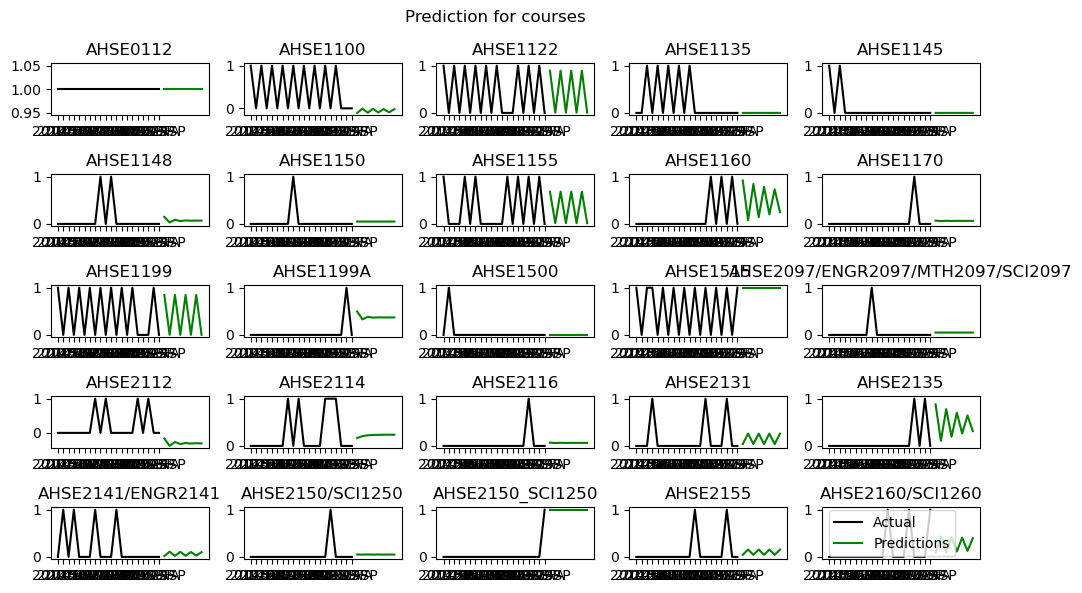

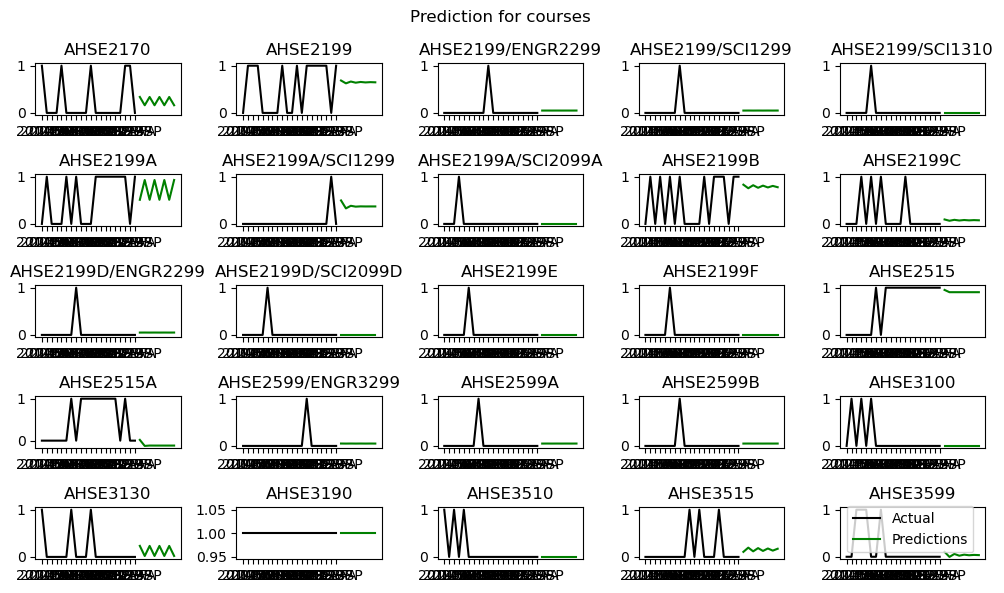

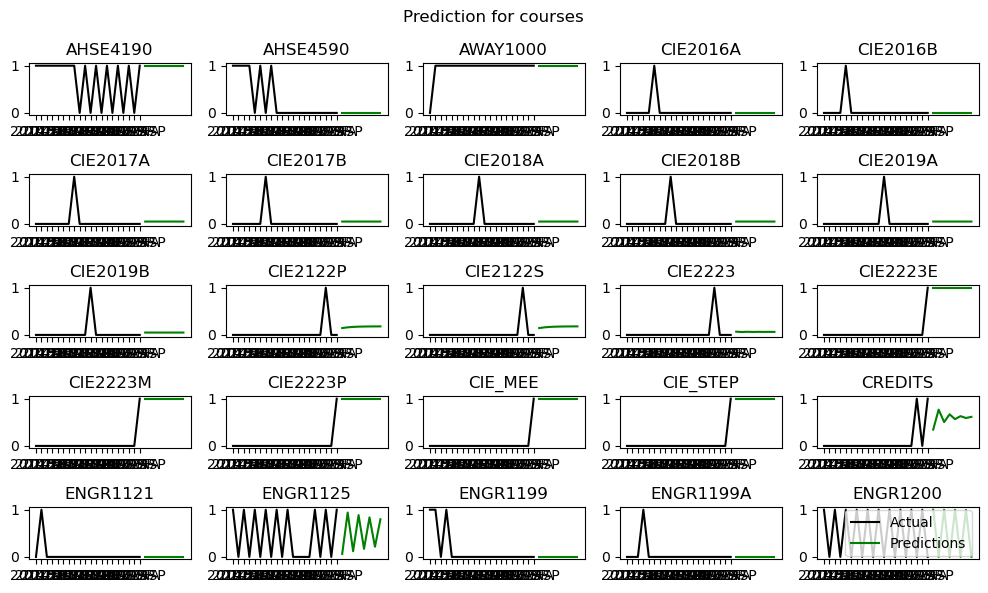

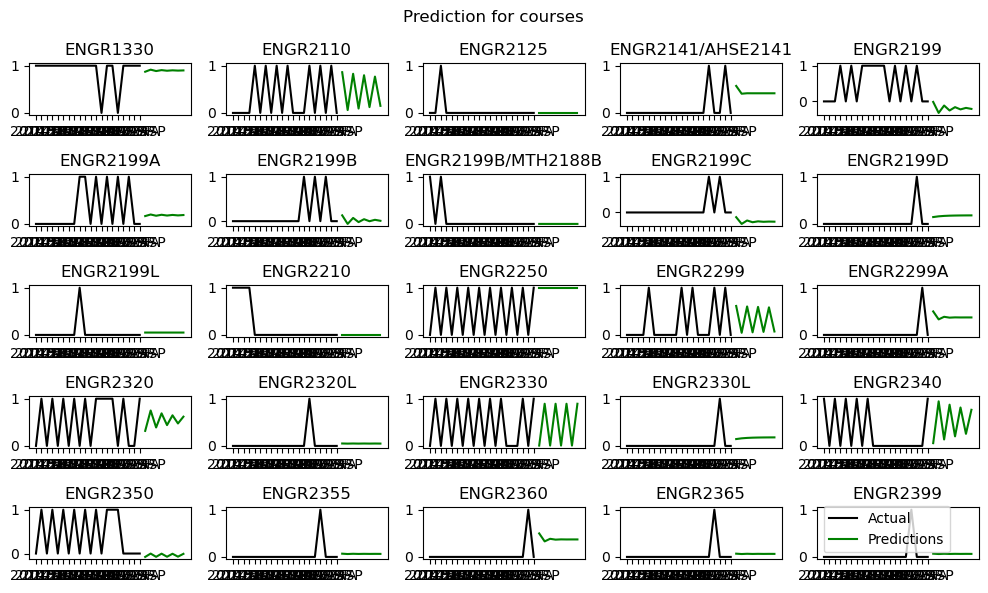

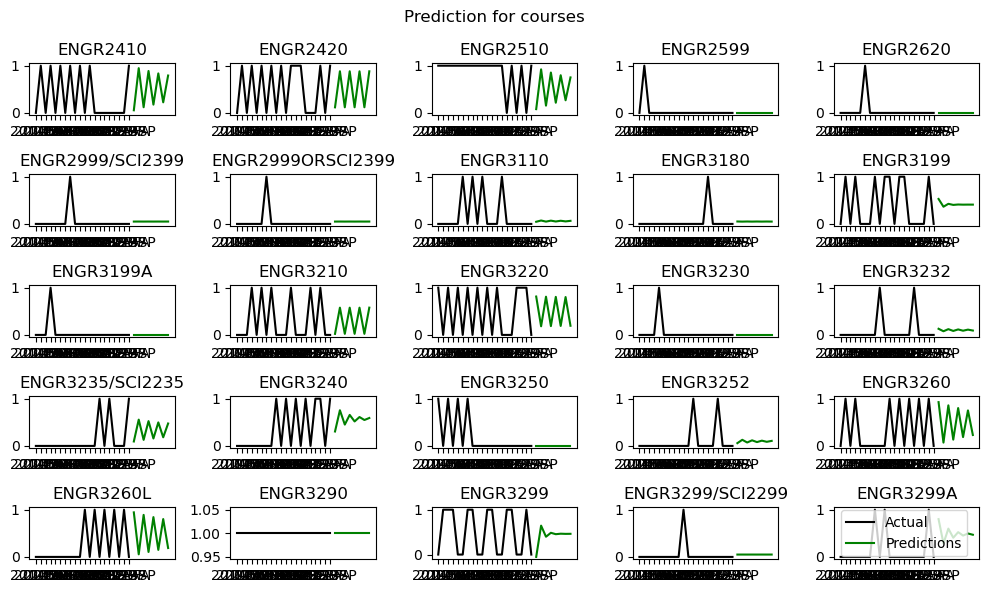

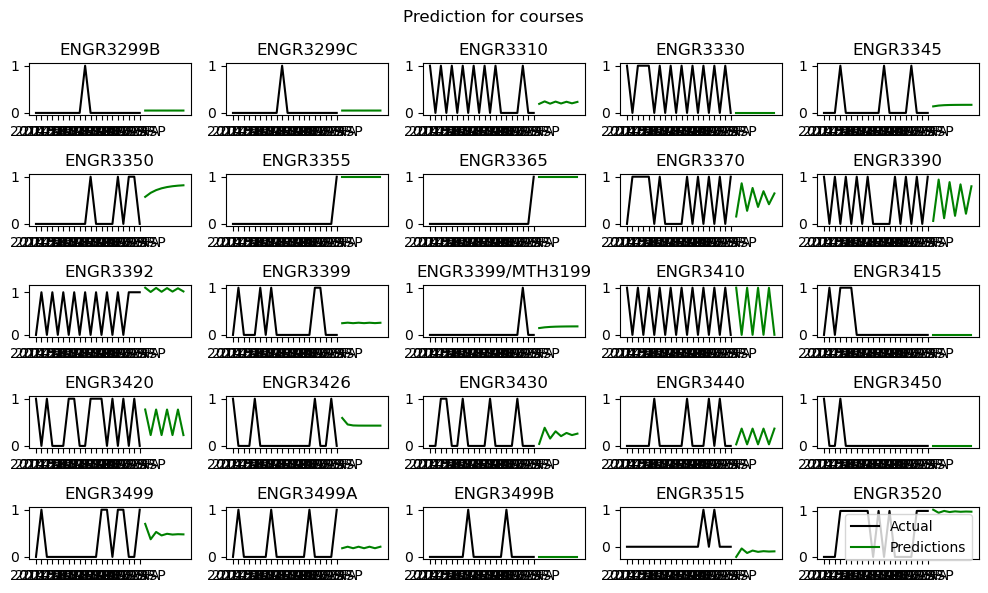

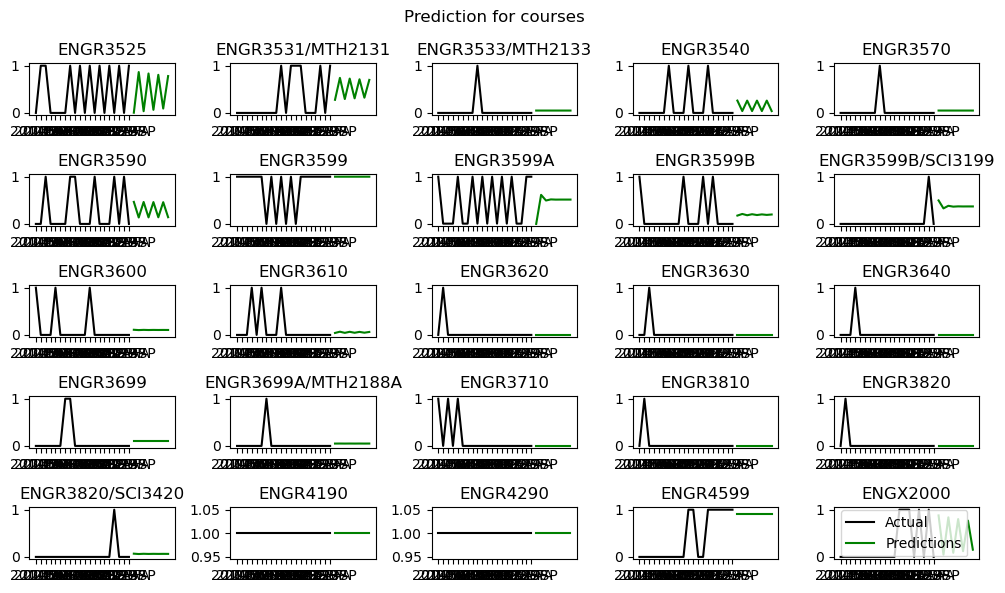

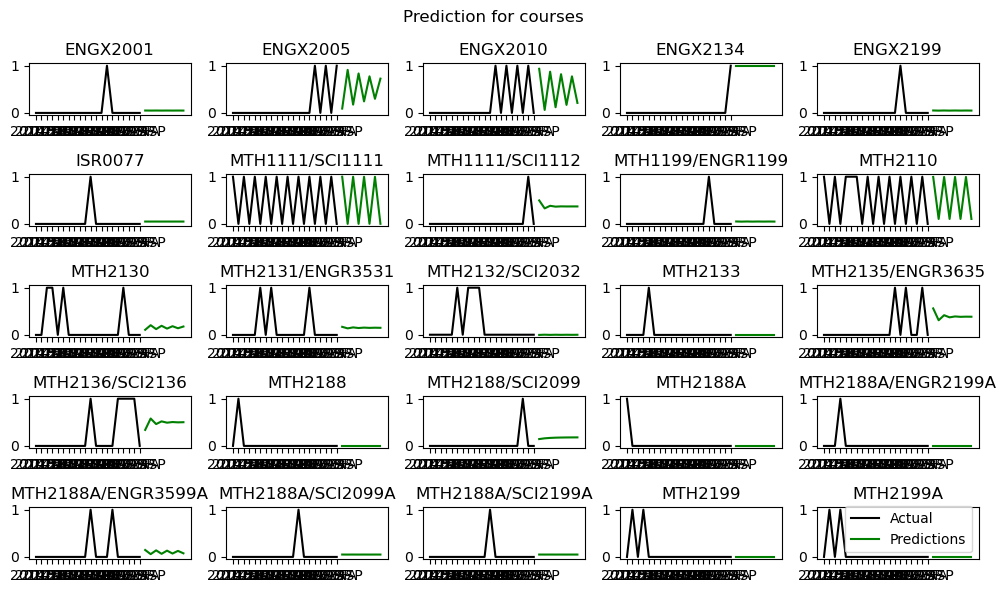

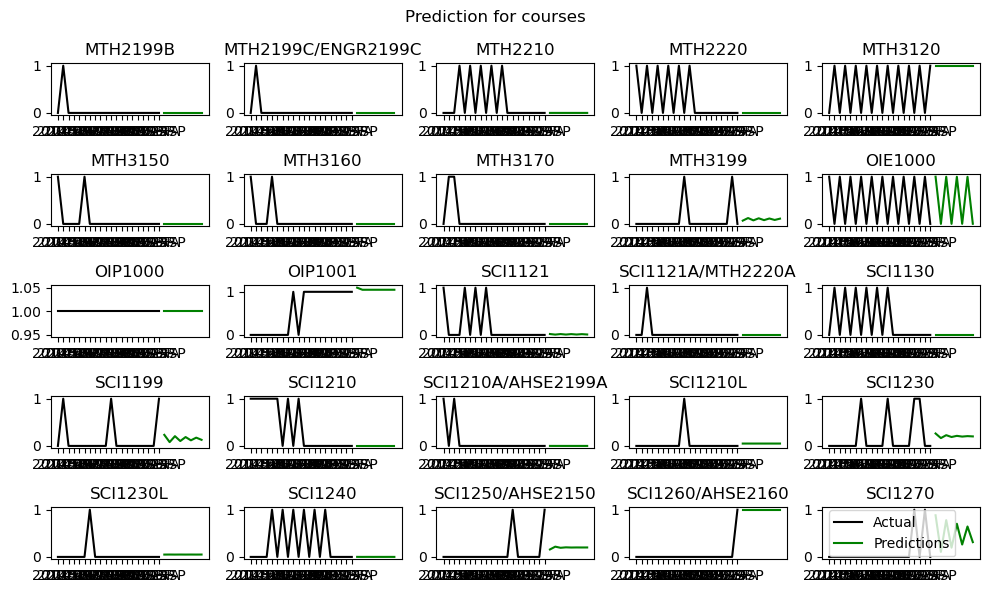

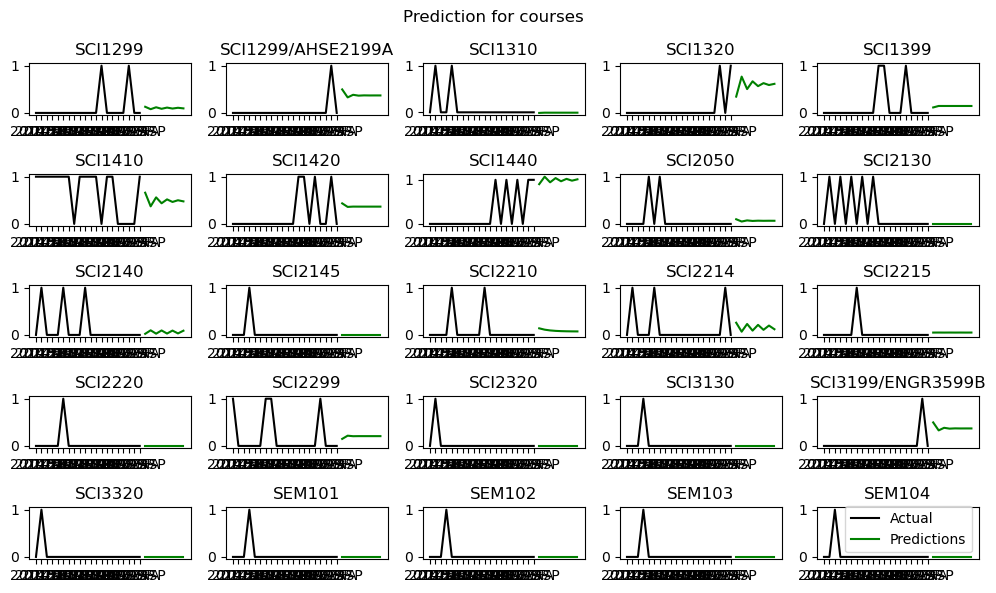

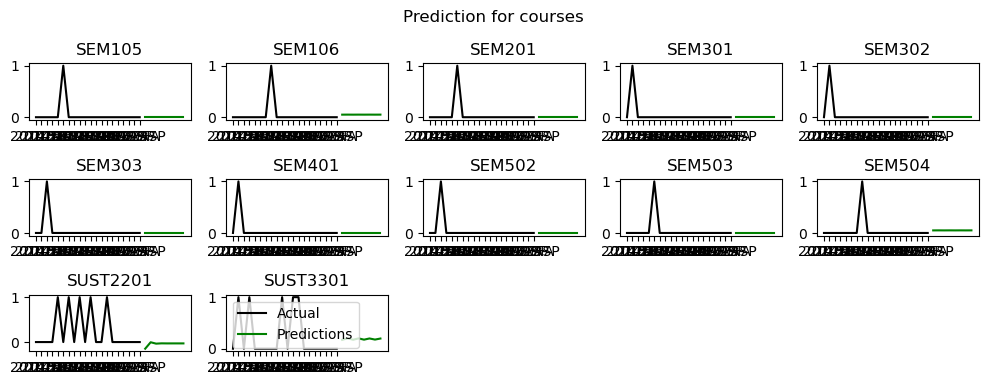

In [44]:
# Number of plots per figure
plots_per_figure = 25

# Calculate the number of figures needed
num_figures = len(prediction) // plots_per_figure + 1

# Loop through each figure
for fig_num in range(num_figures):
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Loop through each plot within the figure
    for i, (pcn, ypo) in enumerate(prediction.items()):
        # Skip plots that don't belong to the current figure
        if i // plots_per_figure != fig_num:
            continue
        
        # Plot the data
        plt.subplot(plots_per_figure // 5, 5, i % plots_per_figure + 1)
        y = course_offering.T[pcn]
        plt.plot(y, color='black', label='Actual')
        plt.plot(ypo, color='green', label='Predictions')
        plt.title(pcn)
    
    # Adjust layout and show legend
    plt.suptitle('Prediction for courses')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [50]:
prediction

{'AHSE0112': 20    1.0
 21    1.0
 22    1.0
 23    1.0
 24    1.0
 25    1.0
 26    1.0
 27    1.0
 Name: Predictions, dtype: float64,
 'AHSE1100': 20   -0.106963
 21   -0.006540
 22   -0.101973
 23   -0.011282
 24   -0.097467
 25   -0.015564
 26   -0.093397
 27   -0.019432
 Name: Predictions, dtype: float64,
 'AHSE1122': 20    0.894168
 21    0.005813
 22    0.894144
 23    0.005836
 24    0.894121
 25    0.005860
 26    0.894097
 27    0.005883
 Name: Predictions, dtype: float64,
 'AHSE1135': 20    0.000001
 21    0.000007
 22    0.000002
 23    0.000006
 24    0.000003
 25    0.000005
 26    0.000003
 27    0.000005
 Name: Predictions, dtype: float64,
 'AHSE1145': 20    0.000013
 21   -0.000031
 22   -0.000004
 23   -0.000021
 24   -0.000010
 25   -0.000017
 26   -0.000013
 27   -0.000015
 Name: Predictions, dtype: float64,
 'AHSE1148': 20    0.148701
 21    0.030993
 22    0.087913
 23    0.060389
 24    0.073699
 25    0.067262
 26    0.070375
 27    0.068870
 Name: Predictions, 

In [81]:
import pandas as pd

# Assuming your data is stored as a dictionary called 'data'

# Define the column names (semesters)
column_names =  ['freshman fall', 'freshman spring', 'sophomore fall', 'sophomore spring', 
                         'junior fall', 'junior spring', 'senior fall', 'senior spring']

# Convert the dictionary to DataFrame and transpose
course_titles_df = pd.DataFrame(course_titles, index=['Course Title']).T
course_titles_df.head()
# Initialize an empty DataFrame
result_df = pd.DataFrame(prediction).T

# Change column names
result_df.columns = column_names

# add course titles
result_df = pd.merge(course_titles_df, result_df, left_index=True, right_index = True)

# Print the resulting DataFrame
result_df.head(20)

# Export to csv
result_df.to_csv('predicted_schedule.csv')
